# 自动编码器
- 对于自动编码器，使用不同的网络架构。在前几层中，减少了隐层神经元的数目，在中间，又开始增加隐层神经元的数量，知道隐层神经元的数量与输入变量的数量相同。
- 中间的隐层可以看做输入的编码变体，其输出决定了编码变体的质量。
- 在这个项目中，利用keras实现一个自动编码器，将SVHN（街景门牌号）基准库从32*32图像编码为32个浮点数。可以通过解码为图像来确定编码器质量。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

In [15]:
# 这是matlab格式数据集，需要使用scipy工具读取
mat = scipy.io.loadmat('data/train_32x32.mat')
mat = mat['X']
b, h, d, n = mat.shape

In [7]:
# 预处理数据
# 计算灰度值
img_gray = np.zeros(shape=(n, b*h))
 
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

for i in range(n):
    img = rgb2gray(mat[:, :, :, i])
    img = img.reshape(1, 1024)
    img_gray[i, :] = img
    
X_train = img_gray/255

In [9]:
img_size = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_dim=img_size, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(img_size, activation='sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [10]:
n_epochs = 10
batch_size = 512
model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size, shuffle=True, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 21s 363us/step - loss: 0.6608 - val_loss: 0.6336
Epoch 2/10
58605/58605 [==============================] - 17s 290us/step - loss: 0.6312 - val_loss: 0.6298
Epoch 3/10
58605/58605 [==============================] - 16s 281us/step - loss: 0.6293 - val_loss: 0.6260
Epoch 4/10
58605/58605 [==============================] - 18s 301us/step - loss: 0.6262 - val_loss: 0.6257
Epoch 5/10
58605/58605 [==============================] - 18s 309us/step - loss: 0.6261 - val_loss: 0.6264
Epoch 6/10
58605/58605 [==============================] - 19s 325us/step - loss: 0.6258 - val_loss: 0.6253
Epoch 7/10
58605/58605 [==============================] - 20s 346us/step - loss: 0.6246 - val_loss: 0.6241
Epoch 8/10
58605/58605 [==============================] - 18s 307us/step - loss: 0.6241 - val_loss: 0.6229
Epoch 9/10
58605/58605 [==============================] - 18s 303us/step - loss: 0.6231 - val_

In [11]:
pred = model.predict(X_train)

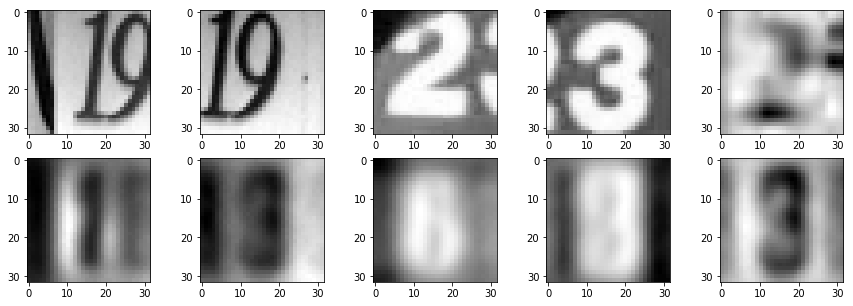

In [20]:
# 绘制原始图像及其解码版本
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap='gray')
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(pred[i].reshape(32, 32), cmap='gray')
plt.show()